# Loading segy data

In [1]:
import pathlib
import warnings

import matplotlib.pyplot as plt
from segysak.segy import get_segy_texthead, segy_header_scan, segy_header_scrape, segy_loader, well_known_byte_locs


In [2]:
warnings.filterwarnings("ignore")

In [3]:
V3D_path = pathlib.Path('/home/capyba/Documentos/PedroGit/LisBelo/0027_JATOBA_39.027-1570.MIG_FIN.1.sgy')

In [4]:
get_segy_texthead(V3D_path)

Text HeaderC 1 CLIENT PETROBRAS              COMPANY                       CREW NO
C 2 LINE  027-1570  AREA  ESPIRITO SANTO
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER
C 4 INSTRUMENT  MFG            MODEL            SERIAL NO
C 5 DATA TRACES/RECORD    24  AUXILIARY TRACES/RECORD       0 CDP FOLD
C 6 SAMPLE INTERVAL  2.00   SAMPLES/TRACE  2250 BITS/IN      BYTES/SAMPLE  4
C 7 RECORDING FORMAT        FORMAT THIS REEL BRV06 MEASUREMENT SYSTEM
C 8 SAMPLE CODE FLOATING PT
C 9 GAIN  TYPE
C10 FILTERS
C11 SOURCE  TYPE            NUMBER/POINT        POINT INTERVAL
C12     PATTERN                            LENGTH        WIDTH
C13 SWEEP  START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE
C14 TAPER  START LENGTH       MS  END LENGTH       MS  TYPE
C15 SPREAD  OFFSET        MAX DISTANCE        GROUP INTERVAL
C16 GEOPHONES  PER GROUP     SPACING     FREQUENCY     MFG          MODEL
C17      TYPE                              LENGTH        WIDTH
C18 TRACES SORTED BY RECORD        PROJECT                LINE ID
C19 AMPLITUDE RECOVERY
C20 MAP PROJECTION                      ZONE ID       COORDINATE UNITS
C21 PROCESSING: E&P-SEDE CLAU S070 - CONVERSAO PARA SEGY FEITA EM 2003
C22 PROCESSING: PROJETO MASTER - ORGANIZACAO DO MASTER
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC MC -    DATUM    PROJ-CODE

In [5]:
scan = segy_header_scan(V3D_path)
scan

100%|██████████| 128/128 [00:00<00:00, 4.53k traces/s]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,128.0,6.925000e+02,37.094474,6.290000e+02,6.607500e+02,6.925000e+02,7.242500e+02,7.560000e+02
TRACE_SEQUENCE_FILE,5,128.0,6.450000e+01,37.094474,1.000000e+00,3.275000e+01,6.450000e+01,9.625000e+01,1.280000e+02
FieldRecord,9,128.0,3.770000e+02,18.552331,3.450000e+02,3.610000e+02,3.770000e+02,3.930000e+02,4.090000e+02
TraceNumber,13,128.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EnergySourcePoint,17,128.0,1.125619e+09,75969.482715,1.125489e+09,1.125554e+09,1.125619e+09,1.125684e+09,1.125749e+09
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,128.0,6.553500e+04,0.000000,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04
SourceEnergyDirectionExponent,223,128.0,-2.220234e+02,9.366942,-2.410000e+02,-2.290000e+02,-2.230000e+02,-2.145000e+02,-2.060000e+02
SourceMeasurementMantissa,225,128.0,7.545000e+02,37.094474,6.910000e+02,7.227500e+02,7.545000e+02,7.862500e+02,8.180000e+02
SourceMeasurementExponent,229,128.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [7]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,128.0,6.925000e+02,37.094474,6.290000e+02,6.607500e+02,6.925000e+02,7.242500e+02,7.560000e+02
TRACE_SEQUENCE_FILE,5,128.0,6.450000e+01,37.094474,1.000000e+00,3.275000e+01,6.450000e+01,9.625000e+01,1.280000e+02
FieldRecord,9,128.0,3.770000e+02,18.552331,3.450000e+02,3.610000e+02,3.770000e+02,3.930000e+02,4.090000e+02
EnergySourcePoint,17,128.0,1.125619e+09,75969.482715,1.125489e+09,1.125554e+09,1.125619e+09,1.125684e+09,1.125749e+09
CDP,21,128.0,7.545000e+02,37.094474,6.910000e+02,7.227500e+02,7.545000e+02,7.862500e+02,8.180000e+02
CDP_TRACE,25,128.0,3.770000e+02,18.552331,3.450000e+02,3.610000e+02,3.770000e+02,3.930000e+02,4.090000e+02
NStackedTraces,33,128.0,5.910156e+01,32.394429,1.000000e+00,2.875000e+01,6.100000e+01,9.125000e+01,1.030000e+02
SourceX,73,128.0,5.565948e+05,369.287711,5.559620e+05,5.562795e+05,5.565940e+05,5.569115e+05,5.572280e+05
SourceY,77,128.0,8.992728e+06,847.824263,8.991276e+06,8.992002e+06,8.992729e+06,8.993454e+06,8.994180e+06
GroupX,81,128.0,8.992882e+06,847.818516,8.991431e+06,8.992156e+06,8.992884e+06,8.993608e+06,8.994334e+06


In [25]:
scan.head(80)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,128.0,6.925000e+02,37.094474,6.290000e+02,6.607500e+02,6.925000e+02,7.242500e+02,7.560000e+02
TRACE_SEQUENCE_FILE,5,128.0,6.450000e+01,37.094474,1.000000e+00,3.275000e+01,6.450000e+01,9.625000e+01,1.280000e+02
FieldRecord,9,128.0,3.770000e+02,18.552331,3.450000e+02,3.610000e+02,3.770000e+02,3.930000e+02,4.090000e+02
TraceNumber,13,128.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EnergySourcePoint,17,128.0,1.125619e+09,75969.482715,1.125489e+09,1.125554e+09,1.125619e+09,1.125684e+09,1.125749e+09
...,...,...,...,...,...,...,...,...,...
ShotPoint,197,128.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ShotPointScalar,201,128.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TraceValueMeasurementUnit,203,128.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TransductionConstantMantissa,205,128.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Explicando os parametros da função segy_loader

Substituir com os valores do dataframe scan, e se possível o scan[scan["std"] > 0]

- iline = INLINE_3D
- xline = CROSSLINE_3D
- cdpx = SourceX
- cdpy = SourceY

In [28]:
V3D = segy_loader(V3D_path, cdpx=73, cdpy=77)


100%|██████████| 128/128 [00:00<00:00, 4.91k traces/s]


Loading as 2D


Converting SEGY: 100%|██████████| 128/128 [00:00<00:00, 1.74k traces/s]


In [13]:
V3D

<xarray.Dataset>
Dimensions:  (cdp: 128, twt: 2250)
Coordinates:
  * cdp      (cdp) uint16 691 692 693 694 695 696 ... 813 814 815 816 817 818
  * twt      (twt) float64 2.0 4.0 6.0 8.0 ... 4.496e+03 4.498e+03 4.5e+03
    cdp_x    (cdp) float32 5.572e+05 5.572e+05 5.572e+05 ... 5.56e+05 5.56e+05
    cdp_y    (cdp) float32 8.991e+06 8.991e+06 8.991e+06 ... 8.994e+06 8.994e+06
Data variables:
    data     (cdp, twt) float32 91.0 232.0 377.0 569.0 ... -99.0 164.0 589.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT PETROBRAS              COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         0027_JATOBA_39.027-1570.MIG_FIN.1.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-5377.4179324718625, -4944.99233224128, -2223.23339...
    coord_scalar:        1.0

Text(0.5, 0, 'XLINE')

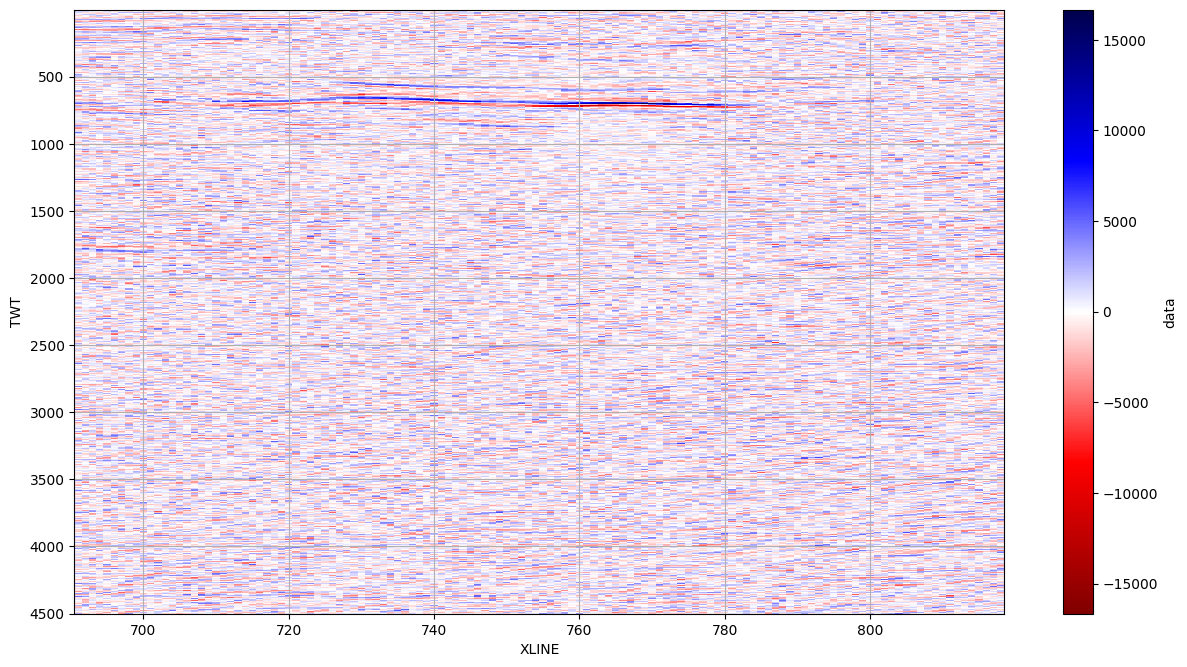

In [30]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8), dpi=100)
iline_sel = 10093
V3D.data.transpose(transpose_coords=True).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")